<a href="https://colab.research.google.com/github/Yan-Weijia/ML/blob/master/ML-HW02/ML-HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

решить задачу бинарной классификации на большом корпусе imdb рецензий на фильмы. 
Корпус скачать http://ai.stanford.edu/~amaas/data/sentiment/

Ваша задача в sklearn, 

используя **три разных алгоритма**, 

**построить и обучить классификаторы**, 

для каждого из них **посчитать метрики качества**. 

Постройте **ROC кривую** и посчитайте **величину ROC AUC**. 

Выберите **лучший** классификатор.

Используя **предсказания вероятностей класса**, 

найдите **15** самых негативных и самых позитивных рецензий по мнению модели.  - 7 баллов

Написать **свои функции**, которые бы считали **tp, fp, tn, fn**, 

и возвращали **точность, полноту и ф-меру** 

и **применить их к результатам**, полученным вашими классификаторами 

(если все сделано правильно, то результаты должны **совпадать** с полученными  sklearn метриками). - 3 балла

### Пример. 情感倾向分类Классификация по тональности на $C = <+,->$
	
Используем индикаторные признаки 指示标志
	

*"... there are virtually no surprises, and the writing is second-rate. So why did I enjoy it so much? For one thing, the cast is great ..."*
	 

<table>
  <tr>
    <th>признак</th>
    <th>значение</th>
    <th></th>
    <th>вес</th>
  </tr>
  <tr>
    <td>$f_1$</td>
    <td>1</td>
    <td> "great" $\in d$ и $c=+$</td>
    <td rowspan="2">1.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_2$</td>
    <td>1</td>
    <td>"second-rate" $\in d$ и $c=-$</td>
    <td rowspan="2">0.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_3$</td>
    <td>1</td>
    <td>"no" $\in d$ и $c=-$ </td>
    <td rowspan="2">0.7</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_4$</td>
    <td>1</td>
    <td>"enjoy" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.8</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_4$</td>
    <td>1</td>
    <td>"great" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.6</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>




</table>
	






In [0]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [0]:
!wget https://github.com/Yan-Weijia/ML/raw/master/ML_HW02/data/test.zip
!wget https://github.com/Yan-Weijia/ML/raw/master/ML_HW02/data/train.zip

In [17]:
import zipfile
f = zipfile.ZipFile("test.zip", "r")
f.extract("test.zip")
f.close()

f = zipfile.ZipFile("train.zip", "r")
f.extract("train.zip")
f.close()

KeyError: ignored

In [0]:
import tarfile
imdb = tarfile.open("aclImdb_v1.tar.gz", "r")
imdb.extractall()

In [0]:
!apt-get --yes install git

In [22]:
rm /content/aclImdb/test/test.zip
rm /content/aclImdb/test/train.zip

NameError: ignored

把dataset变成矩阵

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data) #Learn the vocabulary dictionary and return term-document matrix.
# 学习词汇词典并返回术语文档矩阵。
X_train_counts.shape

(2257, 35788)

# Метод ближайшего соседа

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, twenty_train.target) # clf, classifier, 分类器

In [0]:
from sklearn.metrics import *
# 把test测试集变成矩阵
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=0) 
X_test = count_vect.transform(twenty_test.data) # Extract token counts out of raw text documents using the vocabulary fitted with fit
# 使用适合的词汇从原始文本文档中提取令牌计数 
print(X_test.shape)
predicted = clf.predict(X_test) # 用train好的预测模型预测test
predicted_proba = clf.predict_proba(X_test)
predicted_proba[:5]

(1502, 35788)


array([[0. , 0.6, 0. , 0.4],
       [0.2, 0. , 0. , 0.8],
       [0. , 0. , 0. , 1. ],
       [0.2, 0. , 0. , 0.8],
       [0. , 0.4, 0.4, 0.2]])

In [0]:
# 精确率：sum正反向预测对的 / sum正反向预测错的和对的
acc = accuracy_score(predicted, twenty_test.target)
print('acc={0:1.4f}'.format(acc))

micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))

macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5599
micro F1=0.5599, micro P=0.5599, micro R=0.5599
macro F1=0.5507, macro P=0.5580, macro R=0.5963



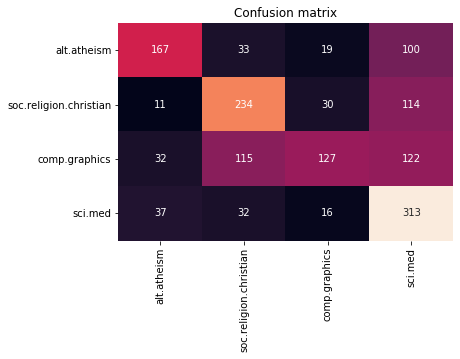

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# 热图（data=混淆矩阵（行标准数据，列预测数据），）
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

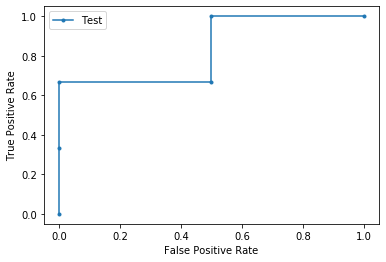

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

y_true = np.array([0, 1, 1, 1, 0])
y_predicted = np.array([0.1, 0.7, 0.4, 0.2, 0.27])
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Метод наивного Байеса

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [0]:
acc = accuracy_score(predicted, twenty_test.target)
print('acc={0:1.4f}'.format(acc))

micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))

macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

In [0]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

# Логистическая регрессия

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
acc = accuracy_score(predicted, twenty_test.target)
print('acc={0:1.4f}'.format(acc))

micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))

macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8915
micro F1=0.8915, micro P=0.8915, micro R=0.8915
macro F1=0.8885, macro P=0.8874, macro R=0.8949



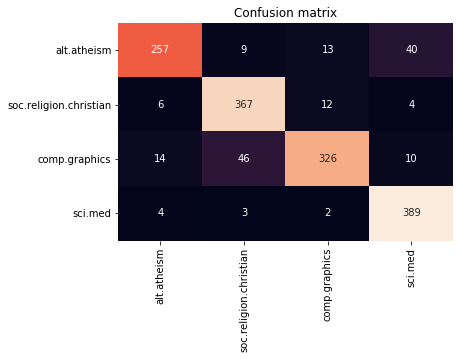

In [0]:

sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()